# Assignment 1, Heorhii Lopatin

The assignment consists of 7 chapters, so the solutions to each of them will be presented seperately. The answers to the concrete questions will be written as comments to the code.

We will start by importing nessecary libraries. 

In [770]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import itertools
import scipy.stats as st
import statsmodels.api as sm

In [771]:
# !pip install seaborn
import seaborn as sns

## Task 1

Load the data, look at it and summarise it in two-three sentences

In [772]:
df = pd.read_csv('dane_projekt1.csv', sep=';')
df

,id,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
0,52,78.93,176.20,2,5,59,979.01,673.17,0,3,194.96
1,101,78.66,165.73,1,3,52,1043.36,543.89,0,2,259.20
2,146,74.29,171.33,1,2,57,1227.69,773.20,0,1,244.41
3,281,79.11,169.24,1,1,59,2356.74,1914.74,1,2,239.77
4,167,79.23,177.78,2,1,48,1264.95,536.29,1,3,291.05
...,...,...,...,...,...,...,...,...,...,...,...
305,136,77.59,170.41,2,3,62,1124.12,415.07,0,3,289.83
306,13,72.39,163.27,1,1,61,701.51,44.23,0,2,282.16
307,309,81.61,173.70,1,2,63,9557.08,3844.10,1,3,-10668.84
308,173,77.24,175.21,2,1,60,1182.43,710.35,0,3,246.36


Let's look at the columns of the given dataset. 

The following is provided as a description of the dataset: 

- id - observation identifier, does not contain any additional information
- waga - weight of respondent (in kg)
- wzrost - height of respondent (in cm)
- plec - gender of respondent's ID (1 - "female", 2 - "male")
- dzieci - number of dependent children of the respondent (in persons)
- wiek - age of respondent (in years)
- dochod- declared income of the respondent in the examined month (in bythalers)
- oszczednosci - declared savings of the respondent in the examined month (in bythalers; negative values denote that the total expenditure exceeded the income)
- jednoos - household status (1 - "single-person household", 0 - "multi-person household")
- miejsce - size of the place where the respondent lives (1 - "up to 10,000 inhabitants", 2 - "from 10,000 inhabitants to 100,000 inhabitants", 3 - "above 100,000 inhabitants")
- wydatki_zyw - declared expenditure on food by the respondent in the examined month (in bythalers).

The id column will not be used, so it should be dropped immediately.

In [773]:
df.drop(["id"], axis=1, inplace=True)

The columns are of the following types: 

In [774]:
categorical = ["plec", "jednoos", "miejsce"]

quantitive = list(set(df.columns) - set(categorical))

In [775]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   waga          310 non-null    float64
 1   wzrost        310 non-null    float64
 2   plec          310 non-null    int64  
 3   dzieci        310 non-null    int64  
 4   wiek          310 non-null    int64  
 5   dochod        310 non-null    float64
 6   oszczednosci  310 non-null    float64
 7   jednoos       310 non-null    int64  
 8   miejsce       310 non-null    int64  
 9   wydatki_zyw   310 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 24.3 KB


We can deduce that there are 310 observetions and the dataset doesn't contain any null values.

Plec, jednoos, miejsce columns are categorical, while the rest is quantitive. Dzieci can also be treated as a categorical column because in the given dataset the number of children is between 0 and 5, so we could say that having x children puts you in a specific category, but it is a quantitive variable at the same time.

Next we will look at the description of each column.

In [776]:
df.describe()

,waga,wzrost,plec,dzieci,wiek,dochod,oszczednosci,jednoos,miejsce,wydatki_zyw
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,79.814742,172.726774,1.458065,2.003226,56.241935,1519.658000,945.994839,0.429032,2.003226,12.383097
std,3.292902,6.906733,0.499044,1.352209,6.746653,1293.464325,787.601212,0.495738,0.739537,3232.382607
min,68.890000,155.670000,1.000000,0.000000,37.000000,645.270000,-204.240000,0.000000,1.000000,-55640.190000
25%,77.430000,167.090000,1.000000,1.000000,52.000000,966.807500,392.545000,0.000000,1.000000,199.757500
50%,79.890000,172.815000,1.000000,2.000000,56.000000,1190.840000,741.190000,0.000000,2.000000,249.265000
75%,82.112500,178.032500,2.000000,3.000000,61.000000,1620.460000,1270.222500,1.000000,3.000000,283.267500
max,86.730000,190.790000,2.000000,5.000000,77.000000,17412.240000,5485.220000,1.000000,3.000000,301.690000


A few things to note: 

Average for gender is 1.46 which implies that among the respondents 46% were females and 54% were males. 

Average age of a respondent was 56 years, which means we can be certain that senior citizens were asked more frequently, assuming no country in the world has such high age average and the minimum for age was 37.

Minimum values for oszczednosci and wydatki_zyw are negative. Negative savings mean that the expenses > income, while negative food expenses shouldn't apper in the dataset, hence we should remove those.

We'll look at how many people live in 1 person apartments with a certain amound of kids

In [777]:
df = df[df["wydatki_zyw"] >= 0]

In [778]:
pd.crosstab(df["dzieci"], df["jednoos"], normalize=True,  margins=True)

jednoos,0,1,All
dzieci,,,
0,0.072368,0.052632,0.125000
1,0.174342,0.118421,0.292763
2,0.128289,0.115132,0.243421
3,0.108553,0.075658,0.184211
4,0.065789,0.049342,0.115132
5,0.032895,0.006579,0.039474
All,0.582237,0.417763,1.000000


Interestingly enough, even with 3 or more kids a significant amount of adults live in single person households, which I find disturbing, to say the least. 

Next we'll look at each column individually.

array([[<Axes: title={'center': 'dzieci'}>,
        <Axes: title={'center': 'dochod'}>,
        <Axes: title={'center': 'wiek'}>],
       [<Axes: title={'center': 'wydatki_zyw'}>,
        <Axes: title={'center': 'waga'}>,
        <Axes: title={'center': 'miejsce'}>],
       [<Axes: title={'center': 'jednoos'}>,
        <Axes: title={'center': 'oszczednosci'}>,
        <Axes: title={'center': 'wzrost'}>]], dtype=object)

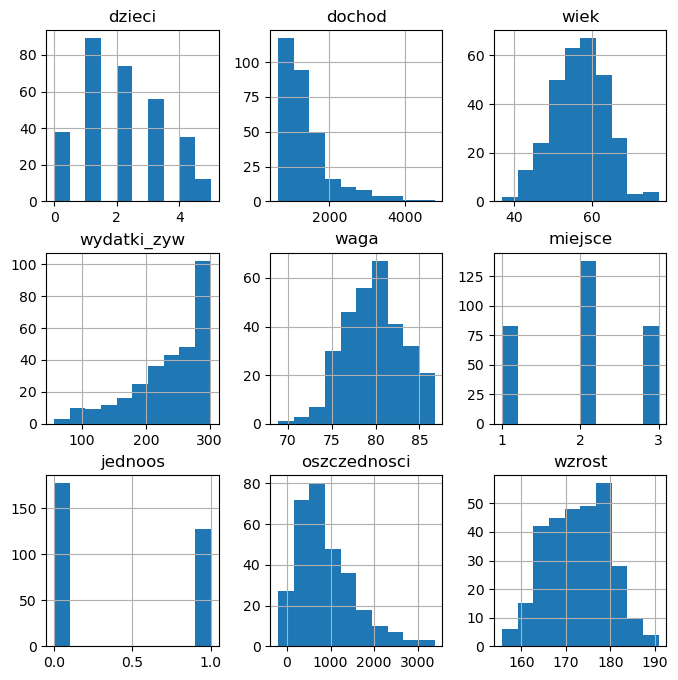

In [779]:
features = list(set(df.columns) - {'plec'})

df[features].hist(figsize=(8, 8))

We can see that height, age and weight columns are visually somewhat close to normal distribution, which is something we could expect of a survey. 

Food expenses and income columns are close to exponential distribution, while  dzieci looks rather like a sample from Poisson distribution.

It should also be noted that more than a third of respondents expends about 300 on food. Perhaps it is related to the fact that most people spend the same % of their income on food, while most of respondents make 1000-2000.

## Task 2

Check for correlations between variables. Calculate and present on a heatmap-type graph a reasonable correlation coefficient between quantitative variables, and examine the correlation of qualitative variables. Comment on the results, paying particular attention to issues of statistical significance


First, let's look at a correlation matrix between all variables.

<Axes: >

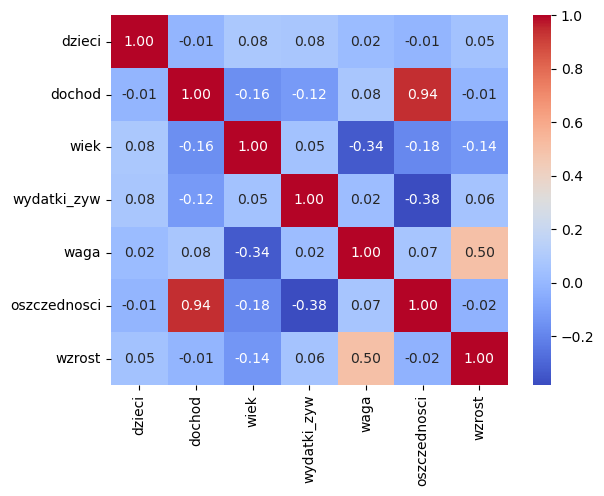

In [780]:
numerical = list(
    set(df.columns)
    - set(
        categorical
    )
)

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',  fmt='.2f')


We can see that weight, height and gender are correlated. This looks natural, as it biologically makes sense. 

Note that age has negative correlation with almost every column. As it was previously noted, mostly elderly people were questioned, hence we can conclude that as people enter their 60s or 70s their weight, height, income and savings tend to decline. 

Savings and income have a correlation coeffitient of 0.94. This implies that the amount a person is savig is directly impacted by how much they earn. 

At the same time, savings are correlated with food expenses by -0.38, meaning that the more the person saves, the less they spend on food.

Next, we will look at correlation of categorical variables separately.

In [781]:
d = itertools.combinations(categorical, 2)
for a,b in d:
    contingency_table = pd.crosstab(df[a], df[b])
    chi2, p, dof, expected = st.chi2_contingency(contingency_table)
    print(f'{a} - {b}: p-value = {p}')

plec - jednoos: p-value = 0.7098649541109077
plec - miejsce: p-value = 0.22342423171950018
jednoos - miejsce: p-value = 0.7695667530897057


As we can see, the p-value is well above the significance level of 0.05(such will be the choice of the significance level for now), so we can't reject the null hypothesis, which in the context of chi2 contingency test states that the two variables are independent. In other words, the variables are not significantly correlated. 


## Task 3

Summarise the data with at least three different graphs

First we will look at a scatterplot for food expenses

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.08, 'Scatterplot for food expenses')

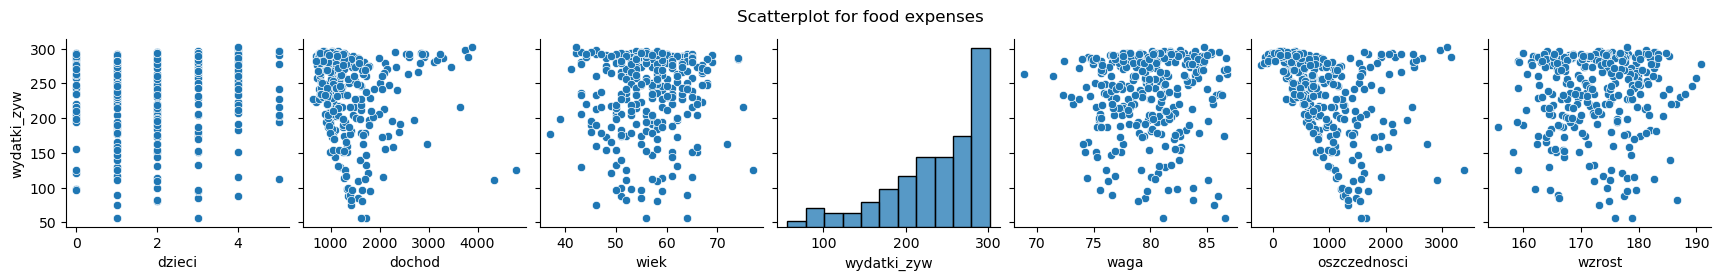

In [782]:

ax = sns.pairplot(df, x_vars=quantitive, y_vars=["wydatki_zyw"])

ax.fig.suptitle("Scatterplot for food expenses", y=1.08)

As it was mentioned before, nearly a third of respondants spends about 300 on food. It looks weird becouse their average income or weight seems to be the same. To find an explanation, let's first make some checks. We will look at the description of a group of people who spend less than average on food and those who spend more than average on food.

In [783]:
mean = df["wydatki_zyw"].mean()
df_low_expenses = df[df["wydatki_zyw"] < mean][quantitive]
df_high_expenses = df[df["wydatki_zyw"] >= mean][quantitive]
df_low_expenses.drop(["wydatki_zyw"], axis=1, inplace=True)
df_high_expenses.drop(["wydatki_zyw"], axis=1, inplace=True)

print("Low expenses")
print(df_low_expenses.describe())
print("High expenses")
print(df_high_expenses.describe())



Low expenses
           dzieci       dochod        wiek        waga  oszczednosci  \
count  127.000000   127.000000  127.000000  127.000000    127.000000   
mean     1.881890  1426.469134   55.543307   79.572047   1112.777323   
std      1.366342   616.415160    7.024623    3.306505    548.793985   
min      0.000000   645.270000   37.000000   72.330000    232.550000   
25%      1.000000  1015.450000   51.000000   76.845000    687.055000   
50%      2.000000  1285.930000   56.000000   79.830000   1032.900000   
75%      3.000000  1626.060000   61.000000   81.725000   1410.555000   
max      5.000000  4780.150000   77.000000   86.570000   3390.590000   

           wzrost  
count  127.000000  
mean   171.996142  
std      7.047841  
min    155.670000  
25%    166.605000  
50%    171.590000  
75%    177.460000  
max    188.080000  
High expenses
           dzieci       dochod        wiek        waga  oszczednosci  \
count  177.000000   177.000000  177.000000  177.000000    177.000000   


Indeed, both groups have roughly the same average height, weight and age. 

However the first group earns less and saves more. Later on in the analysis we will check for correlation between those variables. Perhaps conservative lifestyle is to blame for such division (e.g. we try not to spend a lot, so we don't spend a lot on food), or something else.

Text(0.5, 1.0, 'Violinplot for size of city and income')

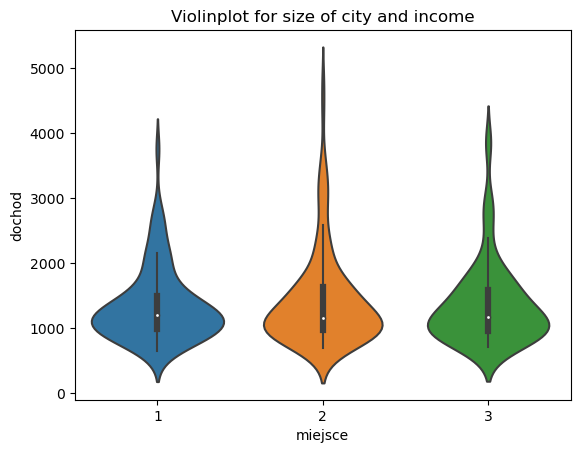

In [784]:

ax = sns.violinplot(data=df[df.dochod < 8000], y="dochod", x="miejsce")
ax.set_title("Violinplot for size of city and income")


Note that the average for each group is the same, which is not something one would expect. Usually average income is biggest in large cities, as well as the gap between lower and upper class. However the plot shows that the most significant division is in the second group. Maybe farming is popular in bajtocja, or the data is not from 2024.

Text(0.5, 1.0, 'Stacked bar chart for gender and one-person household')

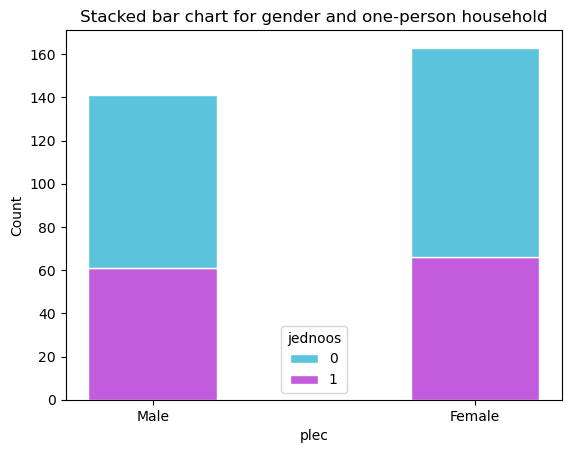

In [785]:
df_cp = df.copy()
df_cp["plec"] = df_cp["plec"].apply(lambda x:  "Male" if x == 2 else "Female")

ax = sns.histplot(
    df_cp,
    x='plec',
    hue='jednoos',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    edgecolor='white',
    shrink=0.4
)
ax.set_title("Stacked bar chart for gender and one-person household")

Percentage of people living in a one-person household is roughly the same for both genders, which is expected. It is surprising though that nearly 40% of respondents in both groups live alone.

Up next we will use a technique called t-distributed Stochastic Neighbor Embedding which helps represent multidimensional data on a plane preserving the distance between points.

In [786]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [787]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [788]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 2.54 s, sys: 1.4 s, total: 3.94 s
Wall time: 691 ms


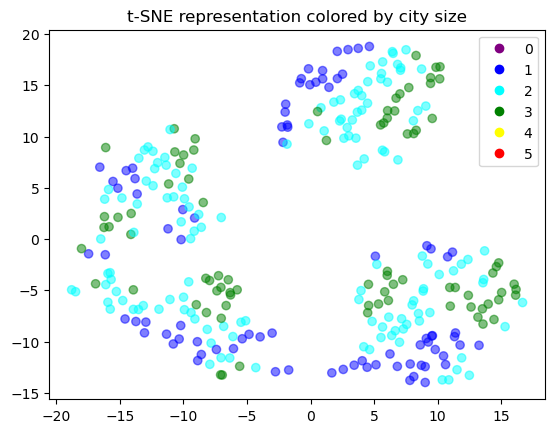

In [789]:
colors = {0: "purple", 1: "blue", 2: "cyan", 3: "green", 4: "yellow", 5: "red"}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    # c=df["jednoos"].map({0: "blue", 1: "orange"}),
    c=df["miejsce"].map(colors),
    alpha=0.5,
)
plt.title("t-SNE representation colored by city size")
plt.legend(markers, colors.keys(), numpoints=1)

Here we can see that the size of the city that the person lives in can be separated from other columns in the dataset.

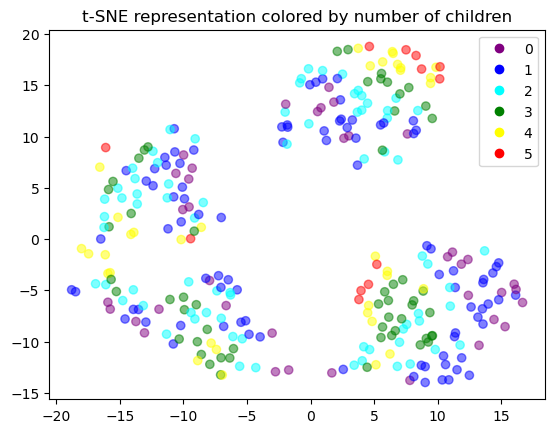

In [790]:
colors = {0: "purple", 1: "blue", 2: "cyan", 3: "green", 4: "yellow", 5: "red"}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in colors.values()]
plt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    # c=df["jednoos"].map({0: "blue", 1: "orange"}),
    c=df["dzieci"].map(colors),
    alpha=0.5,
)
plt.title("t-SNE representation colored by number of children")
plt.legend(markers, colors.keys(), numpoints=1)

It is much harder, on the other hand, to separate respondents by number of children. This could also potentially mean that it would be hard to predict how many children a person has, based on other columns.

## Task 4 
Calculate two-sided confidence intervals at a confidence level of 1 - α = 0.99 for the age variable for the following distribution parameters:
- mean and standard deviation;
- quartiles 1, 2 and 3.

Since the wiek variable follows normal distribution, we will use standart fromulas to calculate the confidence intervals.

In [791]:
wiek_mean = df["wiek"].mean()
wiek_std = df["wiek"].std()

confidence = 0.99 
alpha = 1 - confidence

In [792]:

z = st.norm.ppf(1 - alpha / 2)
n = len(df["wiek"])
eps = z * wiek_std / np.sqrt(n)

print("99% Confidence interval for age mean: ({:.8f}, {:.8f})".format(wiek_mean - eps, wiek_mean + eps))


99% Confidence interval for age mean: (55.25787117, 57.26186568)


In [793]:
wiek_mean = df["wiek"].mean()
wiek_std = df["wiek"].std()


n = len(df["wiek"]) - 1

t1 = st.chi2.ppf(1 - alpha / 2, df=n)
t2 = st.chi2.ppf(alpha / 2, df=n)
ns = n * (wiek_std ** 2)
v1 = np.sqrt(ns/t1)
v2 = np.sqrt(ns/t2)


print("99% Confidence interval for std: ({:.8f}, {:.8f})".format(v1, v2))

99% Confidence interval for std: (6.13639484, 7.56820760)


In [794]:
df["wiek"].describe()

count    304.000000
mean      56.259868
std        6.782444
min       37.000000
25%       51.750000
50%       56.500000
75%       61.000000
max       77.000000
Name: wiek, dtype: float64

Since no formula for quantiles was provided on the labs, the one I found on the internet will be used. 

In [795]:
#https://stats.stackexchange.com/questions/448618/confidence-interval-for-quantiles-distribution-free-asymptotic-and-assuming-a
quantiles = [0.25, 0.5, 0.75]
wiek_mean = df["wiek"].mean()
wiek_std = df["wiek"].std()
n = len(df["wiek"])

for q in quantiles:
    delta = -np.sqrt(n) * st.norm.ppf(q)
    t1 = st.t.ppf(1 - alpha / 2, n-1, delta)*wiek_std/np.sqrt(n)
    t2 = st.t.ppf(alpha / 2, n-1, delta)*wiek_std/np.sqrt(n)
    print (f"Confidence interval for {q} quantile: ({wiek_mean - t1}, {wiek_mean - t2})")
    



Confidence interval for 0.25 quantile: (50.67683231064825, 52.69352603166061)
Confidence interval for 0.5 quantile: (55.25152156054645, 57.26821528155881)
Confidence interval for 0.75 quantile: (59.82621081044465, 61.84290453145701)


To me the intervals seem to be authorised because we have more than 300 samples of the variable. In all of the cases, the actual paramater falls inside the confidence interval that we've calculated, which gives even more confidence. In each estimation we assume that the variable follows normal distribution, that samples are random and independent, and the size of the sample is large (300 should be more than enough), but is small relatively to the whole population.

## Zadanie 5

Byteotian sociologists divide Byteotian society according to four wealth classes:
- lower class (earned income below the 25th centile of the income distribution)
- middle class (earned income equal to or above the 25th centile and below the 75th centile of the income distribution)
- Upper middle class (attained income equal to or higher than the 75th percentile and lower than the 90th percentile of the income distribution)
- Upper class (income attainment equal to or above the 90th percentile of the income distribution)
Discuss and compare the variation in food expenditure across the above wealth classes 


In [796]:
q25 = df["dochod"].quantile(0.25)
q75 = df["dochod"].quantile(0.75)
q90 = df["dochod"].quantile(0.90)
df["klasa"] = df["dochod"].apply(lambda x: 1 if x < q25 else 2 if  x < q75 else 3 if x < q90 else 4)
class_dict = {1: "Lower", 2: "Middle", 3: "Upper middle", 4: "Upper", 5: "Rich"}
for c in range(1, 5):
    mean = df["wydatki_zyw"][df["klasa"] == c].mean()
    std = df["wydatki_zyw"][df["klasa"] == c].std()
    print(f"{class_dict.get(c)} Class food expenses: {mean} +- {std}")
df.drop(["klasa"], axis=1, inplace=True)

Lower Class food expenses: 258.6101315789473 +- 31.33304923956689
Middle Class food expenses: 231.22664473684208 +- 59.344930656526344
Upper middle Class food expenses: 201.49044444444448 +- 65.86981450888064
Upper Class food expenses: 249.86258064516124 +- 56.08326303914814


/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/1559054965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["klasa"] = df["dochod"].apply(lambda x: 1 if x < q25 else 2 if  x < q75 else 3 if x < q90 else 4)
/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/1559054965.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["klasa"], axis=1, inplace=True)


Surprisingly enough, food expenses are the highest in the lower wealth class. It is unexpected since higher wealth classes simply can afford to spend more on food. Although it's important to rememeber that the average age of a respondent is more than 50 years. Older people tend to go out less and spend most of their time home. It is possible that the average in the lower class is so high because food is something that contributes greatly to those people feeling happy.

## Task 6
Answer the following research questions by conducting the best-fit statistical tests at a significance level of α = 0, 01:
- Are women characterised by higher savings values than men?
- Is a lower proportion of food expenditure relative to income correlated with higher savings?
- Is the average weight of women in the sample higher than 56 kg?
and:
- verify an additional (sensible) hypothesis of consistency with a specific parametric distribution for the selected variable (e.g. ‘variable A has a Poisson distribution with parameter 1’).

State the assumptions used and comment on whether they seem reasonable to you. 

In order to answer the first question, conduct a Student's two sample t-test. 

The null hypothesis is that means among both groups do not differ significantly, while the alternative hypothesis is the opposite.

In [797]:
m_savings = df[df["plec"] == 2]["oszczednosci"]
f_savings = df[df["plec"] == 1]["oszczednosci"]
t_stat, p_value = st.ttest_ind(f_savings, m_savings)

print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 0.4279557413869727, p-value: 0.6689883649475534


The p-value is above the chosen significance level, therefore we conclude that there is no significant difference in savings of men and women.

Next we will check for correlation between food expenditure relative to income and savings. We previously saw that there seems to be difference between people who spend less than average and more than average on food, so we expect that the correlation between the columns is significant. We will calculater person r value. 

The null hypothesis is that there is no significant correlation and the alternative is, well, the opposite.

In [798]:
expenses_ratio = df["wydatki_zyw"] / df["dochod"]
savings = df["oszczednosci"]

corr, p_value = st.pearsonr(expenses_ratio, savings)

print(f"Pearson correlation: {corr}, p-value: {p_value}")

Pearson correlation: -0.8882493471959096, p-value: 4.823720622546404e-104


The p value is less than the significance level, therefore we conclude that the null hypothesis is wrong, meaning the variables are strongly correlated. 

The correlation number is -0.85 which tells us that the variables have strong negative correlation, meaning lower expenses mean greater savings. This means that the answer to the second question is positive.

To answer the third question we conduct a t-test once again, this time one-sided, however. 

H_0 is that average female weight is less or equal to 56 kg, alternative is that it's greater.

In [799]:
f_weights = df[df["plec"] == 1]["waga"]
mu = 56

t_stat, p_value = st.ttest_1samp(f_weights, mu, alternative='greater')

print(f"t-statistic: {t_stat}, p-value: {p_value}")


t-statistic: 107.0286338796581, p-value: 1.5711163348632539e-152


The p-value is smaller than the the significane level, so the average women weight is certainly greater than 56 kg. This is unsurprising since mean weight is about 78 kg.

Lastly, let's check if the dzieci collumn follows poisson distribution.

In [800]:
v = df["dzieci"]

print(f"Variance: {v.var()} Mean: {v.mean()}")

Variance: 1.7985821608476666 Mean: 1.9901315789473684


Variance and mean are relatively close, so it makes sense to check. 

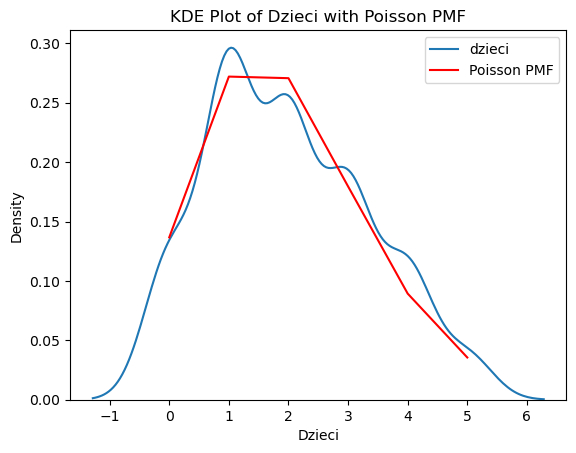

In [801]:
poisson_dist = st.poisson(v.mean())

x = np.arange(0, max(v) + 1)
sns.kdeplot(v, label='dzieci')
plt.plot(x, poisson_dist.pmf(x), 'r-', label='Poisson PMF')
plt.xlabel('Dzieci')
plt.ylabel('Density')
plt.title('KDE Plot of Dzieci with Poisson PMF')
plt.legend()
plt.show()

The plots look kinda the same too, so we will conduct a one sample Kolmogorov-Smirnov test, to determine if the data comes from poisson distribution. The significane level will remain at 0.01 and the zero hypothesis is that doesn't come from the poisson distribution.

In [802]:
st.kstest(v, 'poisson',  args=(2, ))

KstestResult(statistic=0.28100584970983794, pvalue=1.0019448000405118e-21, statistic_location=1, statistic_sign=-1)

Clearly the p-value is smaller than the significance level and therefore we can conclude that the data comes from the poisson distribution with parameter 2.

## Task 7

Run a test on the amount of food expenditure using variables from the base. Assume a significance level of α = 0.01. To do this:

- Estimate an initial model containing all the variables from the original base (except id) and a constant, where the expenditure_zyw variable is the explanatory variable. Remember to decode the qualitative variables. (0.5pts)
- Comment on R2, tests of pooled and individual significance in the initial model. (1pt)
- Check that the preliminary model meets the assumptions of the Classical Linear Regression Model (KMRL). Pay particular attention to the issues of linearity of the functional form, homoskedasticity and lack of autocorrelation of the random component and the distribution of the random component. (2pts)
- Check whether there is a problem of imprecise collinearity (multicollinearity) in the initial model (0.5 points)
- Using an analysis of the outlier observations for the initial model, check whether the base contains errors. If you find suspicious observations, decide and justify what you do with them. (1pt)
- Improve the model so that it meets as many KMRL assumptions as possible. Describe the steps taken to obtain the ‘best’ model (4pkt).
Hint: Consider different functional forms and transformations of the variables.
- Provide a quantitative interpretation of a selection of two individually significant coefficients in the ‘best’ model. Remember that a constant is not interpreted. Recommended choice of non-transformed variables. (1pt)
- What are the descriptive characteristics of individuals who are characterised by food expenditure belonging to the top 10% of food expenditure predictors in your ‘best’ model? Check and discuss (2pct).


In [803]:
data = pd.get_dummies(df, columns=categorical)
# data = df

X = data.drop(columns=['wydatki_zyw'])
y = data['wydatki_zyw']

X= sm.add_constant(X)
X = X.astype(float)
y = y.astype(float)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     61.90
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.51e-66
Time:                        23:19:14   Log-Likelihood:                -1488.6
No. Observations:                 304   AIC:                             2999.
Df Residuals:                     293   BIC:                             3040.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           99.2794     39.923      2.487   

R-squared value is 0.7 which means that 70% of wydatki_zyw variable can be explained thruogh the rest of the variables. 
In terms of individual variables, provided that the confidence level is 0.05, only a handful of variables contribute: const, dzieci, dochod, oszczednosci, plec, miejsce. 

Of those variables, the most significant ones seem to be dochod and oszcednosci, with t value over 20. We have already discussed why those columns are correlated, so this result could be expected. Number of children and the fact that a person lives alone also seem to contribute greatly. This makes sense because as a parent you have more people to take cared of, while living alone implies the opposite.

To check if the model satisfies the CLMR assumptions, they should first be at least listed:

- Linear trend,

- Independent residuals (lack of autocorrelation),

- Normally distributed residuals,

- Equal variance of residuals for all values of independent variables (homoscedasticity).

We will check them visually by creating and analyzing the following diagnostic plots:

- The residual value vs the fitted value,
- The root square of the absolute value of standardized residuals vs the fitted value,
- The line plot of the residuals,
- Graphical analysis of the distribution of the residuals (histogram, boxplots, qq-plot).

(the text taken from exercises)

### Linear functional form

Text(0, 0.5, 'Residuals')

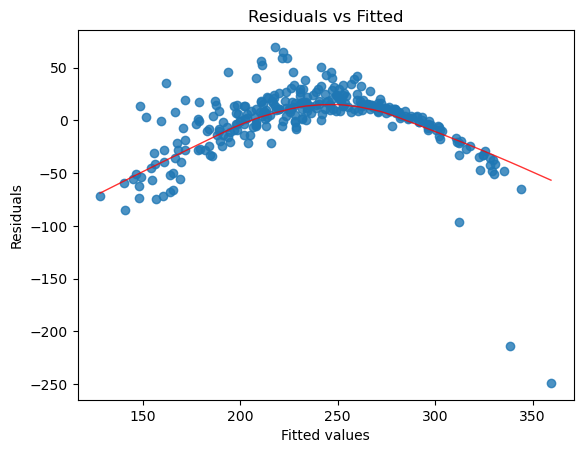

In [804]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

As we can see, the trend is clearly not linear, therefore the linearity assumption is violated.

### Independent residuals

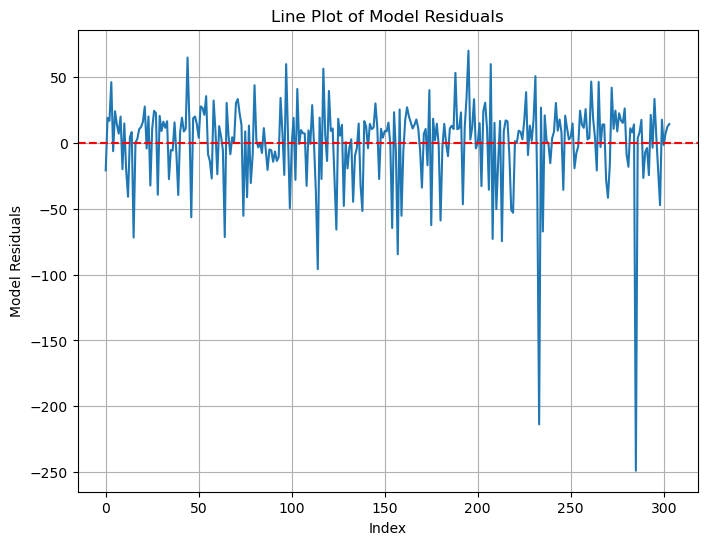

In [805]:
indices = range(len(model_residuals))

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=indices, y=model_residuals, linestyle='-')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Line Plot of Model Residuals')
plt.xlabel('Index')
plt.ylabel('Model Residuals')
plt.grid(True)
plt.show()

The residuals do seem to be independent, therefore the second assumption is not violated.

### Normally distributed residuals

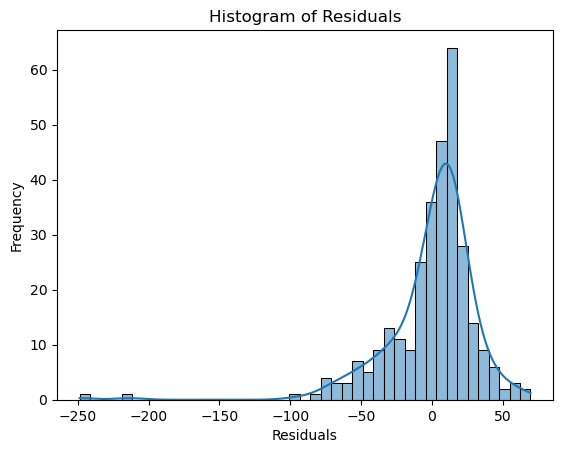

In [806]:
model_residuals = results.resid
sns.histplot(model_residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

There is a bump at -250, and the graph seems to be cutoff at 60. Even though it does remind normal distribution, it's not perfect. Therefore the assumption is "meh" - kinda holds but it's hard to say.

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

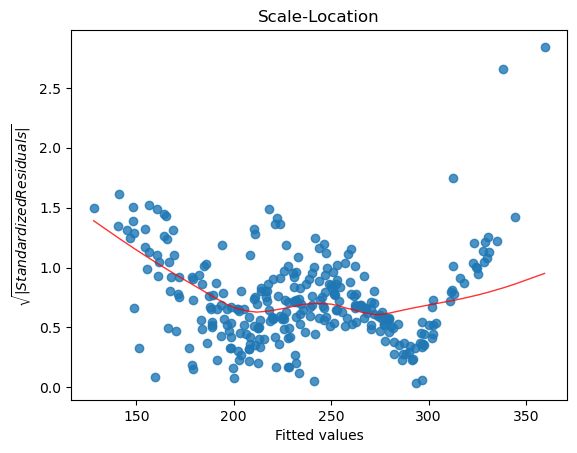

In [807]:
from statsmodels.graphics.gofplots import ProbPlot


# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid
# normalized residuals
model_norm_residuals = results.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_2 = plt.figure()
sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_2.axes[0].set_title('Scale-Location')
plot_lm_2.axes[0].set_xlabel('Fitted values')
plot_lm_2.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Clearly, the data is not homoscedastic, therefore the assumption is violated.

Next we will check if there is a problem with multicollinearity in the model and if there are influential observations.

In [808]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature        VIF
0          const   0.000000
1           waga   1.731495
2         wzrost   2.248774
3         dzieci   1.028401
4           wiek   1.203732
5         dochod   9.216374
6   oszczednosci  11.222733
7         plec_1        inf
8         plec_2        inf
9      jednoos_0        inf
10     jednoos_1        inf
11     miejsce_1        inf
12     miejsce_2        inf
13     miejsce_3        inf


/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/opt/homebrew/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Since VIF is >10 for oszczednosci, there are problems. 

/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/3095779162.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  sm.graphics.influence_plot(results, criterion="cooks").show()


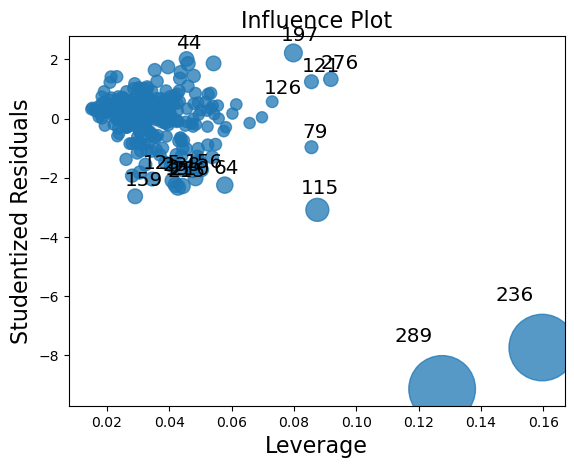

In [809]:
sm.graphics.influence_plot(results, criterion="cooks").show()

The most influential observations are 289, 236 and 115. Judging by how far those observations are from the rest, it seems like those are errors. In this situation, the most sensible thing to do is to delete them. 

In [810]:
df.drop([289,236, 115], inplace=True)

/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/4080861513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop([289,236, 115], inplace=True)


Now that we have removed the outliers, we can fit the model again and check the results, while also applying a transformation to the dependent variable.

In [811]:
from sklearn import preprocessing
data = pd.get_dummies(df, columns=categorical)

X = data.drop(columns=['wydatki_zyw'])
y = data['wydatki_zyw']

X= sm.add_constant(X)
X = X.astype(float)
y = y.astype(float)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.6
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.98e-113
Time:                        23:19:15   Log-Likelihood:                -1356.2
No. Observations:                 301   AIC:                             2734.
Df Residuals:                     290   BIC:                             2775.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           46.6787     27.187      1.717   

Text(0, 0.5, 'Residuals')

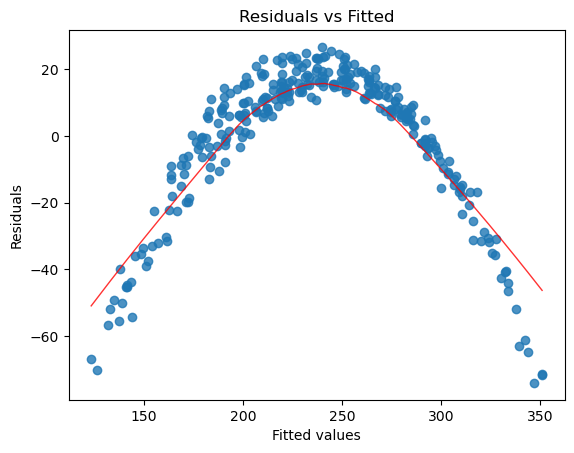

In [812]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Residuals vs Fitted graph kinda reminds a parabola, so it seems natural to try to square some of the variables. Since coeffitients in dochod and oszednosci are almost equal and have different, signs, it means that we should consider their difference as a separate variable
Since dochod and oszczednosci are the most important, we will try them. 

Better, but it's not quite what we're looking for... At this point it's important to notice that the coeffitients
reason food expenses are so related to income and savings is because food expenses are reletaed to general expenses of a person. It might be beneficial to add an additional "expenses" column. After squaring it, this is what we get

In [813]:
from sklearn import preprocessing
data = pd.get_dummies(df, columns=categorical)

X = data.drop(columns=['wydatki_zyw'])
# X["dochod"] = X["dochod"]**2
# X["oszczednosci"] = X["oszczednosci"]**2
X["wydatki"] = (X["dochod"] - X["oszczednosci"])**2

y = data['wydatki_zyw']

X= sm.add_constant(X)
X = X.astype(float)
y = y.astype(float)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            wydatki_zyw   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.549e+04
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        23:19:15   Log-Likelihood:                -443.38
No. Observations:                 301   AIC:                             910.8
Df Residuals:                     289   BIC:                             955.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2849      1.319      0.216   

The R-squared value is now at 1.0, which is basically as good as it can get. We also see that waga, dzieci, wiek, dochod, oszczednosci and wydatki have a p-value of 0, which implies that there some of the columns were more important than it was originally suspected.

The variable wydatki has a -0.0004 coeffitient, which means that the higher the expenses are, the lower the food expenses are. This is confirmed by some previous analysis on the wydatki_zyw variable, where it was shown that the more a person makes and the more saves, the smaller their food expenses are. At the same time, dochod and oszednosci variables have the same coeffitients, proving that it is the delta that is important.

Text(0, 0.5, 'Residuals')

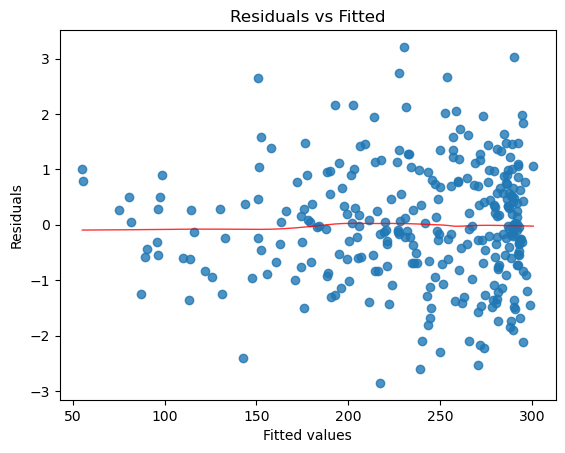

In [814]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Linearity assumption holds

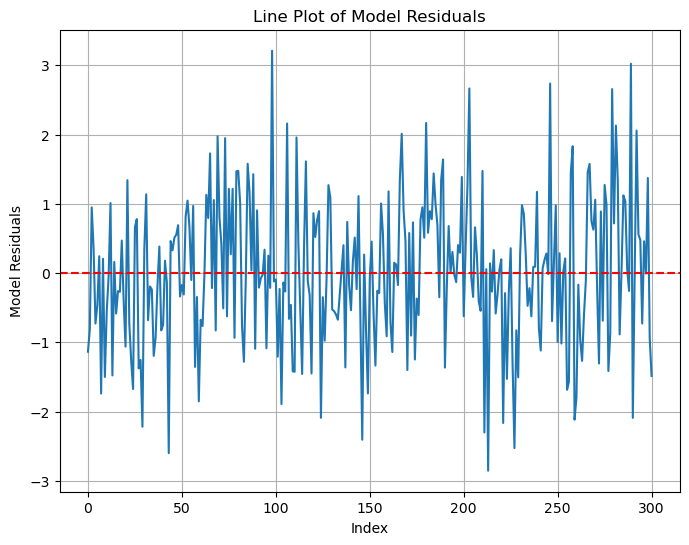

In [815]:
indices = range(len(model_residuals))

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
sns.lineplot(x=indices, y=model_residuals, linestyle='-')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Line Plot of Model Residuals')
plt.xlabel('Index')
plt.ylabel('Model Residuals')
plt.grid(True)
plt.show()

The residuals are independent, the second assumption is fulfilled.

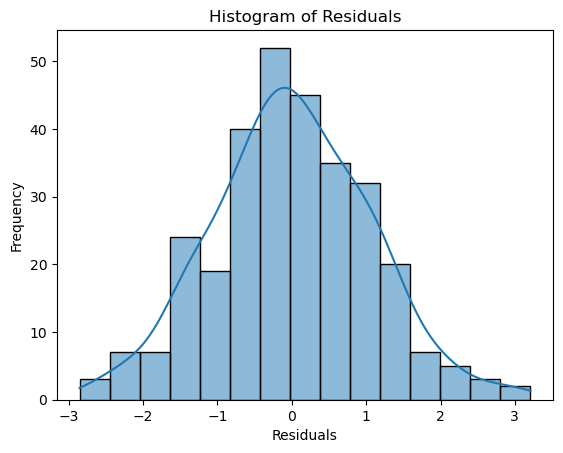

In [816]:
model_residuals = results.resid
sns.histplot(model_residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Residuals are normally distributed, the third assumption holds.

Text(0, 0.5, 'Residuals')

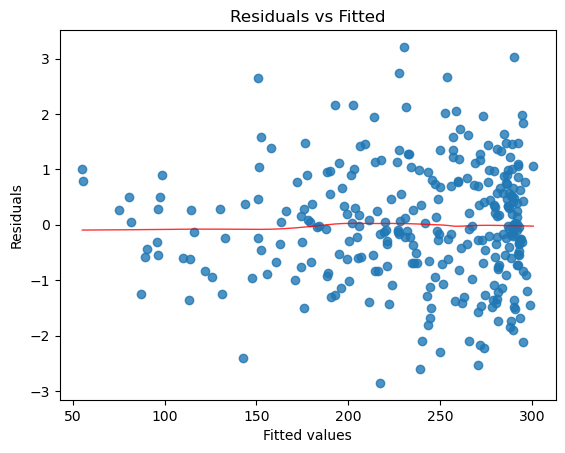

In [817]:
# model values
model_fitted_y = results.fittedvalues
# model residuals
model_residuals = results.resid

# here we use matplotlib
# with sns.residplot
# we draw the scatterplot of residuals against the fitted values (scatter=True)
# and we add a regression line
plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.regplot(x=model_fitted_y, y=model_residuals,
                                scatter=True,
                                ci=False,
                                lowess=True,
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

The last assumption holds as well.

Lastly, we'll check for features of people who have the highest predicted wydatki_zyw values (top 10%)

In [818]:
model_fitted_y = results.fittedvalues
df["wydatki_zyw_pred"] = model_fitted_y

top10 = df[df["wydatki_zyw"] >= df["wydatki_zyw_pred"].quantile(0.9)]
df.drop(["wydatki_zyw_pred"], axis=1, inplace=True)
top10.drop(["wydatki_zyw_pred"], axis=1, inplace=True)
print("All food expenses:")
print(df.describe())
print("Top 10% of food expenses:")
print(top10.describe())

All food expenses:
             waga      wzrost        plec      dzieci        wiek  \
count  301.000000  301.000000  301.000000  301.000000  301.000000   
mean    79.809402  172.807608    1.465116    2.003322   56.259136   
std      3.304593    6.960977    0.499612    1.340394    6.788664   
min     68.890000  155.670000    1.000000    0.000000   37.000000   
25%     77.400000  167.070000    1.000000    1.000000   51.000000   
50%     79.900000  172.880000    1.000000    2.000000   57.000000   
75%     82.140000  178.140000    2.000000    3.000000   61.000000   
max     86.730000  190.790000    2.000000    5.000000   77.000000   

            dochod  oszczednosci     jednoos     miejsce  wydatki_zyw  
count   301.000000    301.000000  301.000000  301.000000   301.000000  
mean   1360.797276    867.673455    0.411960    2.000000   236.418771  
std     596.720124    639.038726    0.493008    0.743864    56.686368  
min     645.270000   -204.240000    0.000000    1.000000    56.270000  

/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/325106759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["wydatki_zyw_pred"] = model_fitted_y
/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/325106759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["wydatki_zyw_pred"], axis=1, inplace=True)
/var/folders/c5/l_7bjws53d7dxl4msb8qfgj80000gn/T/ipykernel_54998/325106759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Summing up, people with highest predicted food expenses:
 - more of them are males than on average (46% vs 63%)
 - they are on average 3 years younger 
 - have 0.87 more kids on average 
 - make about 190 more but save about 100 less
 - spend around 60 more on food on average
